In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, FunctionTransformer

from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

from graphviz import Source
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import  BaggingRegressor
from xgboost import XGBRegressor
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv('fitbit_dataset.csv')
df.head()

,Unnamed: 0,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
#checking null values
df.isnull().sum()

,0
Unnamed: 0,0
Id,0
ActivityDate,0
TotalSteps,0
TotalDistance,0
TrackerDistance,0
LoggedActivitiesDistance,0
VeryActiveDistance,0
ModeratelyActiveDistance,0
LightActiveDistance,0


In [ ]:
df.describe()

,Unnamed: 0,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,1373.000000,1.373000e+03,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000
mean,694.483613,4.782326e+09,7247.360524,5.194137,5.167036,0.128591,1.380670,0.541748,3.180153,0.001733,19.551347,13.502549,184.610342,993.426074,2264.449381
std,404.339894,2.381544e+09,5214.783821,3.988507,3.974632,0.695630,2.588989,0.873557,2.119602,0.007800,31.667869,26.605437,114.289153,314.794986,754.164188
min,0.000000,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,343.000000,2.320127e+09,3108.000000,2.140000,2.110000,0.000000,0.000000,0.000000,1.580000,0.000000,0.000000,0.000000,108.000000,729.000000,1793.000000
50%,693.000000,4.445115e+09,6910.000000,4.900000,4.900000,0.000000,0.080000,0.190000,3.230000,0.000000,2.000000,5.000000,195.000000,1058.000000,2114.000000
75%,1045.000000,6.962181e+09,10538.000000,7.480000,7.440000,0.000000,1.810000,0.780000,4.680000,0.000000,29.000000,18.000000,260.000000,1247.000000,2766.000000
max,1396.000000,8.877689e+09,36019.000000,28.030001,28.030001,6.727057,21.920000,6.480000,12.510000,0.110000,210.000000,660.000000,720.000000,1440.000000,4900.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1373 non-null   int64  
 1   Id                        1373 non-null   int64  
 2   ActivityDate              1373 non-null   object 
 3   TotalSteps                1373 non-null   int64  
 4   TotalDistance             1373 non-null   float64
 5   TrackerDistance           1373 non-null   float64
 6   LoggedActivitiesDistance  1373 non-null   float64
 7   VeryActiveDistance        1373 non-null   float64
 8   ModeratelyActiveDistance  1373 non-null   float64
 9   LightActiveDistance       1373 non-null   float64
 10  SedentaryActiveDistance   1373 non-null   float64
 11  VeryActiveMinutes         1373 non-null   int64  
 12  FairlyActiveMinutes       1373 non-null   int64  
 13  LightlyActiveMinutes      1373 non-null   int64  
 14  Sedentar

In [ ]:
#dropped irrelevant columns
df = df.drop(columns=[
    'Unnamed: 0',
    'Id',
    'ActivityDate',
    'TrackerDistance',
    'LoggedActivitiesDistance',
    'SedentaryActiveDistance',
    'VeryActiveDistance',
    'ModeratelyActiveDistance',
    'LightActiveDistance'
])

In [ ]:
df.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004,7.11,33,12,205,804,1819
1,17609,11.55,89,17,274,588,2154
2,12736,8.53,56,5,268,605,1944
3,13231,8.93,39,20,224,1080,1932
4,12041,7.85,28,28,243,763,1886


**Exploratory Data Analysis**

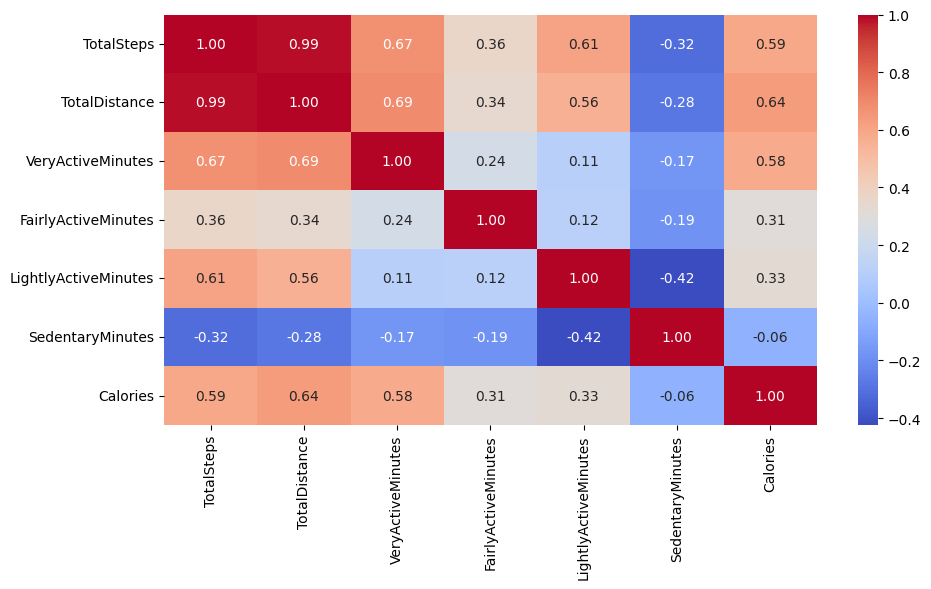

In [ ]:
#correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.show()

In [ ]:
correlation_with_calories = corr_matrix['Calories'].sort_values(ascending=False)
print(correlation_with_calories)

Calories                1.000000
TotalDistance           0.636053
TotalSteps              0.591304
VeryActiveMinutes       0.582567
LightlyActiveMinutes    0.327038
FairlyActiveMinutes     0.310074
SedentaryMinutes       -0.061020
Name: Calories, dtype: float64


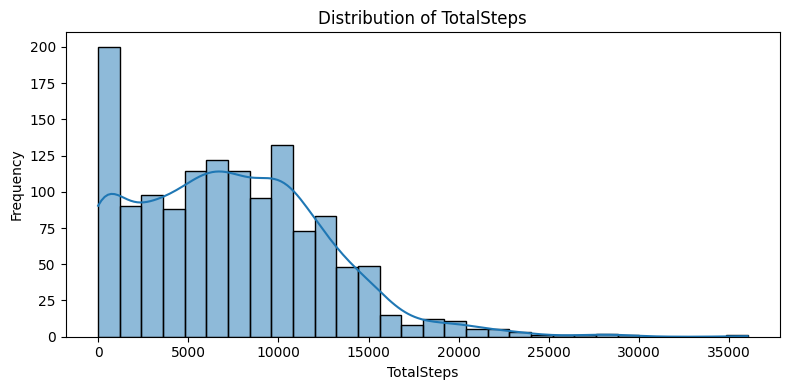

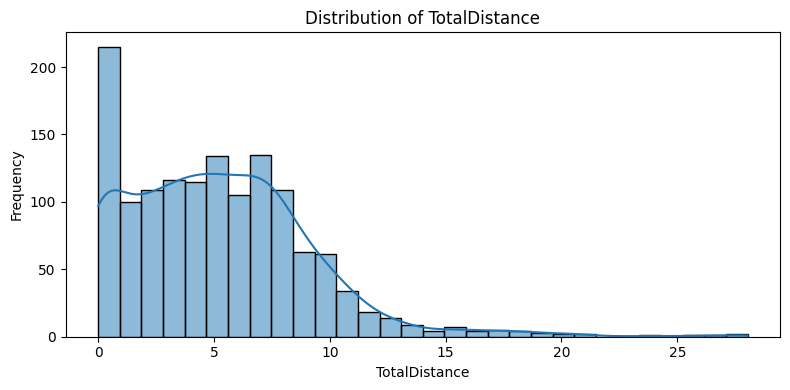

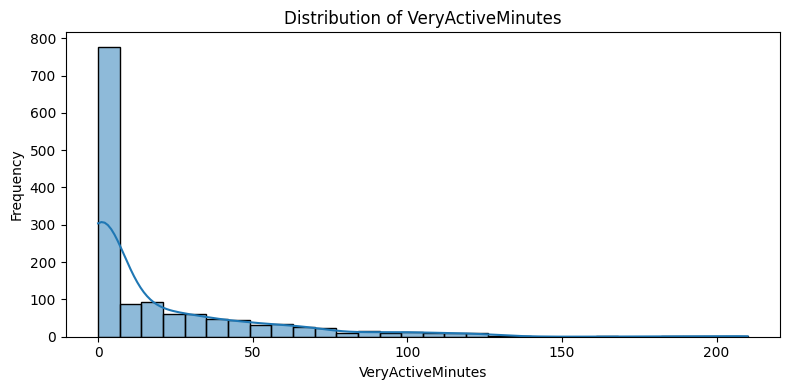

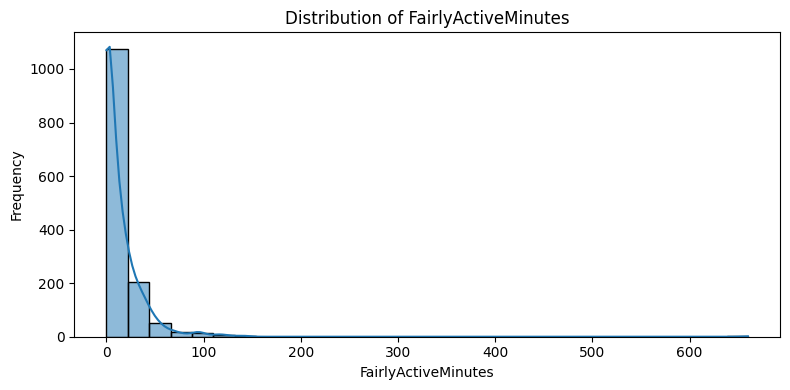

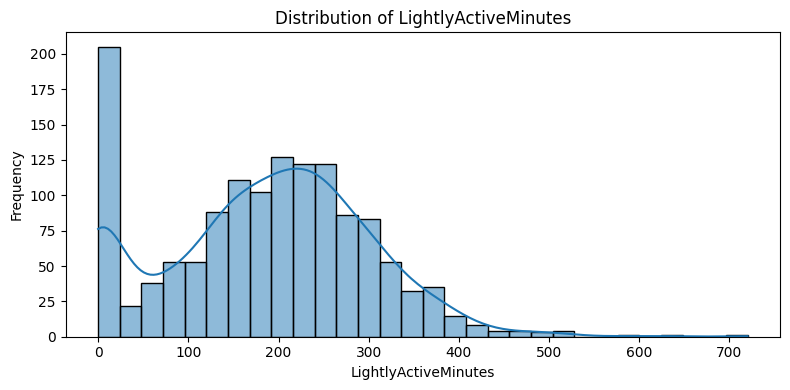

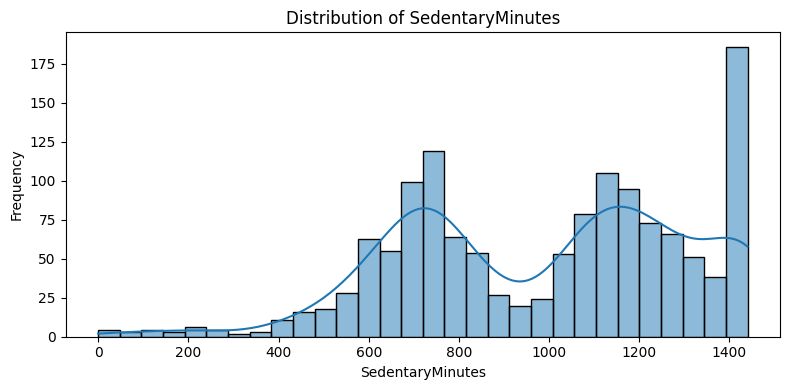

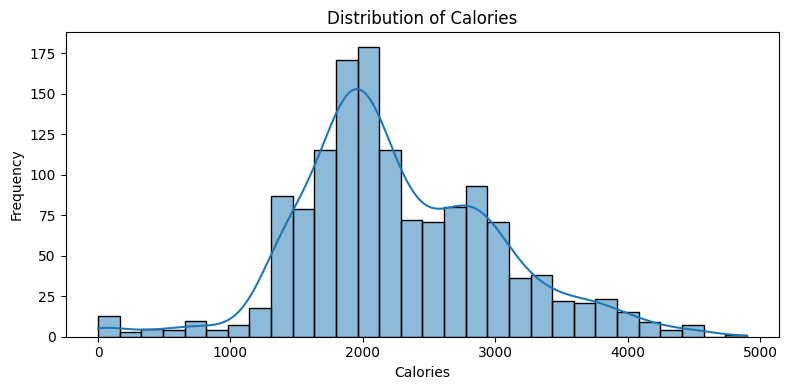

In [ ]:
#distribution plots
features = [
    'TotalSteps',
    'TotalDistance',
    'VeryActiveMinutes',
    'FairlyActiveMinutes',
    'LightlyActiveMinutes',
    'SedentaryMinutes',
    'Calories'
]

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

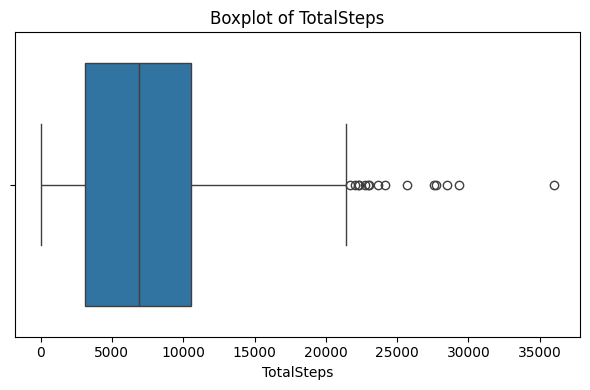

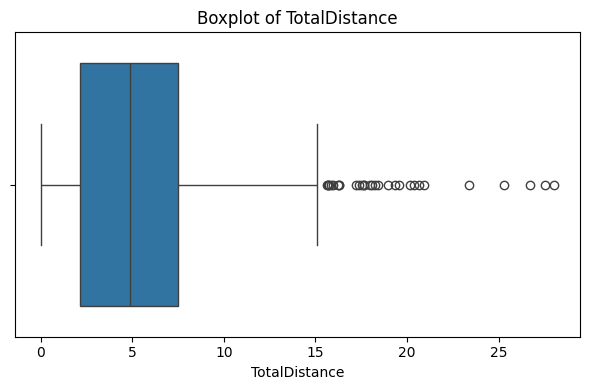

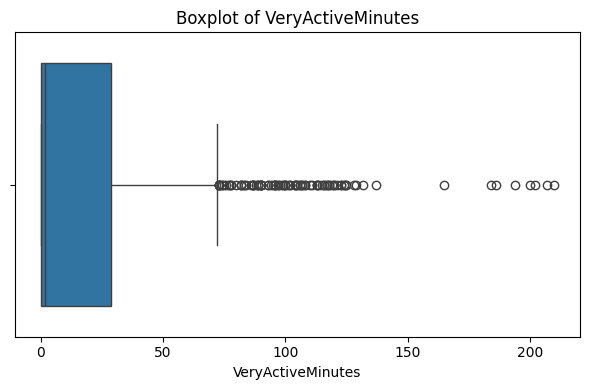

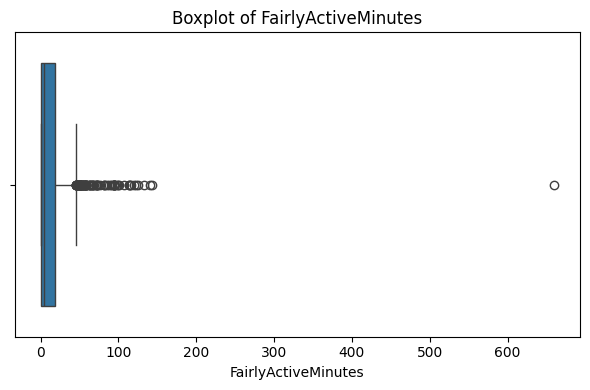

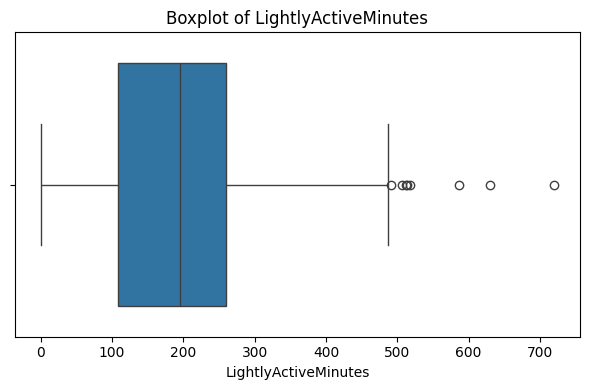

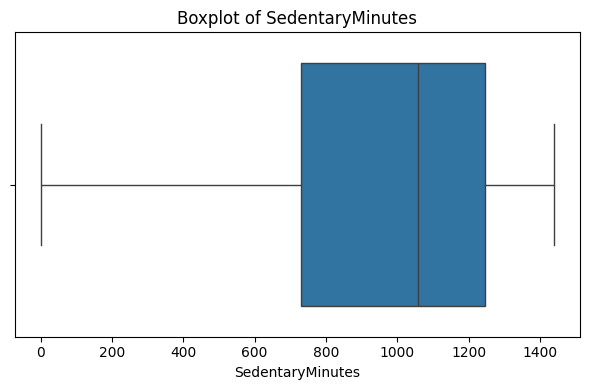

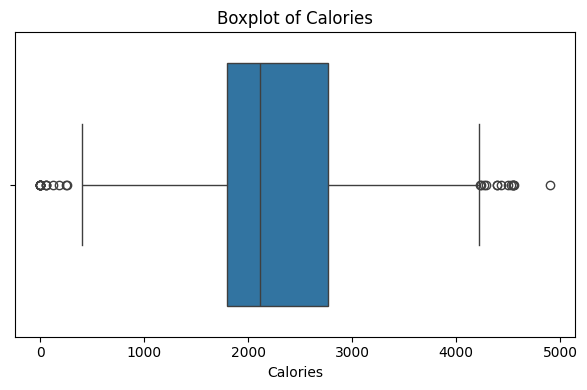

In [ ]:
#boxplot
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

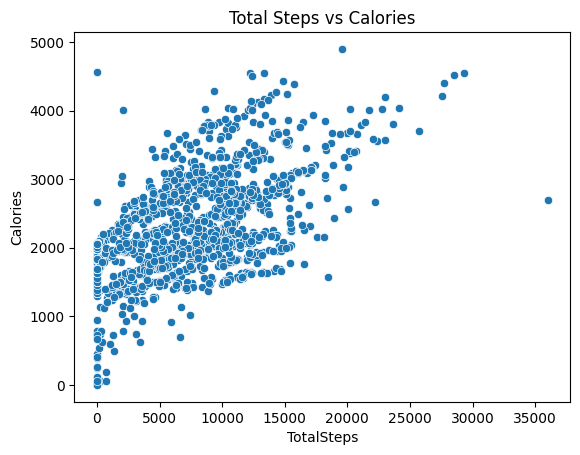

In [ ]:
#scatter plot

sns.scatterplot(data=df, x='TotalSteps', y='Calories')
plt.title('Total Steps vs Calories')
plt.show()

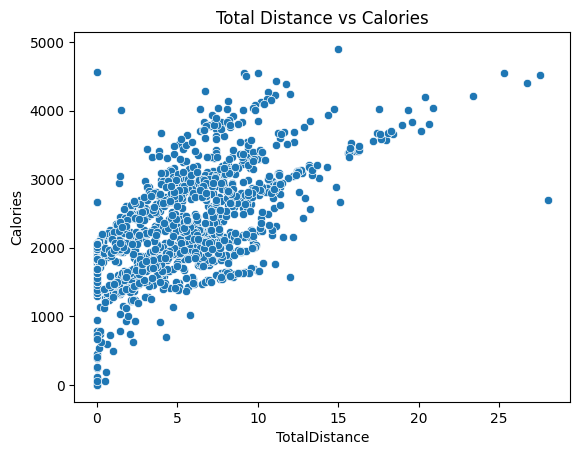

In [ ]:
sns.scatterplot(data=df, x='TotalDistance', y='Calories')
plt.title('Total Distance vs Calories')
plt.show()

**Model Training**

In [ ]:
#splitting data for model training

X = df.drop('Calories', axis=1)
y = df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)
lr_predictions = y_pred_lr.copy()

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Linear Regression metrics:
MAE: 388.6615381750625
MSE: 266882.0045967288
RMSE: 516.606237473696
R² Score: 0.5275068438340259


In [ ]:
comparison_df_lr = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_lr[:5].round(2)
})

print(comparison_df_lr)

   Actual Calories  Predicted Calories
0             2354             2021.10
1             2324             1914.04
2             2044             2141.72
3             3439             2500.99
4             1878             1752.32


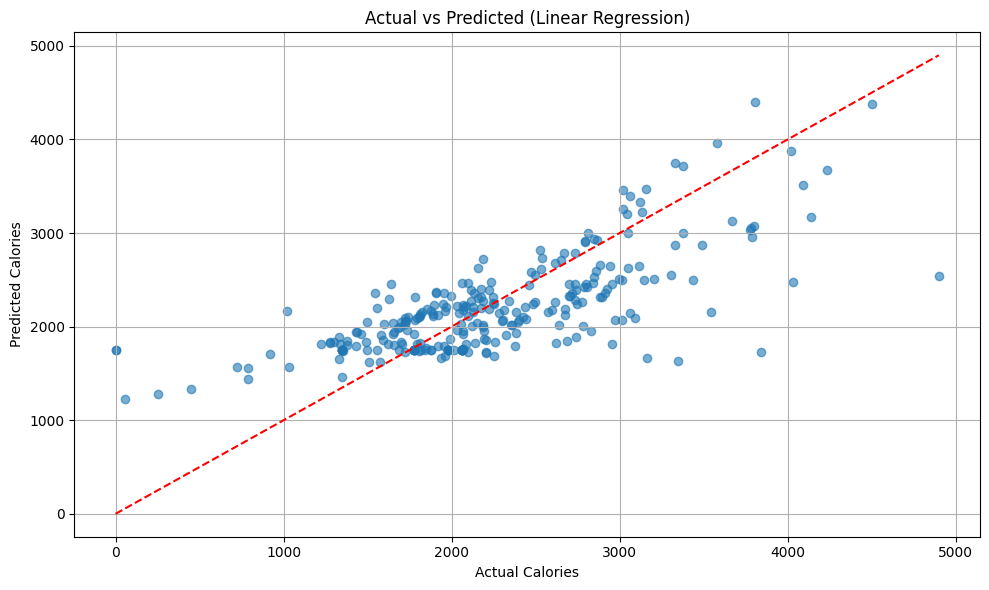

In [ ]:
#actual vs predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.grid(True)
plt.show()

**Scaling Features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

2. Ridge Regression

In [ ]:
grid = GridSearchCV(
    Ridge(),
    param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
    cv=5)
grid.fit(X_train_scaled, y_train)
print(f"Best alpha: {grid.best_params_['alpha']}")

Best alpha: 1


In [ ]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [ ]:
y_pred_ridge = ridge_reg.predict(X_test_scaled)
ridge_predictions = y_pred_ridge.copy()

mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Ridge Regression metrics:
MAE: 391.12933647617905
MSE: 266478.3408412857
RMSE: 516.2154015924802
R² Score: 0.5282214980952876


In [ ]:
comparison_df_ridge = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_ridge[:5].round(2)
})
print(comparison_df_ridge)

   Actual Calories  Predicted Calories
0             2354             2012.84
1             2324             1912.74
2             2044             2169.33
3             3439             2492.39
4             1878             1750.69


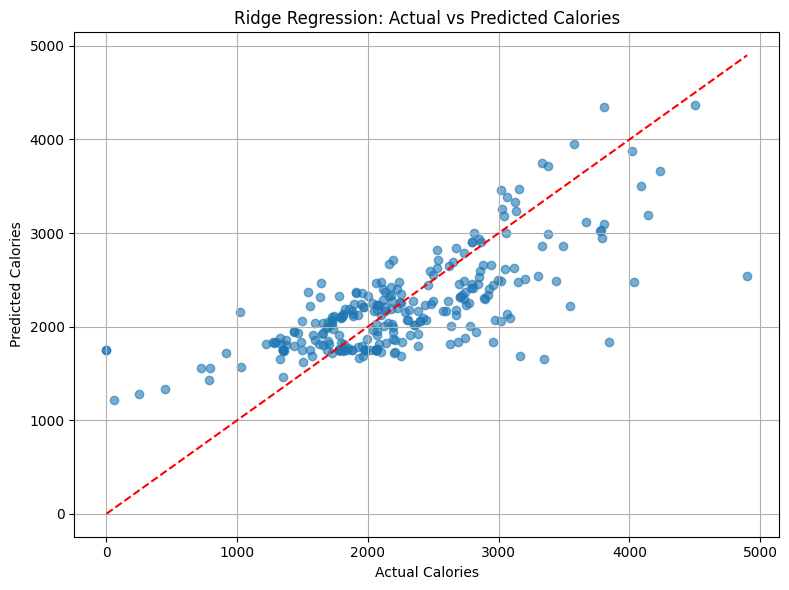

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6)

plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Ridge Regression: Actual vs Predicted Calories')
plt.tight_layout()
plt.grid(True)
plt.show()

3. Lasso Regression

In [ ]:
grid = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
    cv=5
)
grid.fit(X_train_scaled, y_train)
print(f"Best alpha: {grid.best_params_['alpha']}")

Best alpha: 1


In [ ]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [ ]:
y_pred_lasso = lasso_reg.predict(X_test_scaled)
lasso_predictions = y_pred_lasso.copy()

mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)

print("Lasso Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Lasso Regression metrics:
MAE: 390.6768088742335
MSE: 266589.7900993533
RMSE: 516.3233387126262
R² Score: 0.5280241861342347


In [ ]:
#coefficient checking
feature_names = X_train.columns
lasso_coeffs = pd.Series(lasso_reg.coef_, index=feature_names)

print("\nLasso Coefficients:")
print(lasso_coeffs)

non_zero_features = lasso_coeffs[lasso_coeffs != 0]
print("\nFeatures selected (non-zero):")
print(non_zero_features)


Lasso Coefficients:
TotalSteps             -1408.649365
TotalDistance           1459.314519
VeryActiveMinutes        340.007232
FairlyActiveMinutes      168.593580
LightlyActiveMinutes     279.078286
SedentaryMinutes         117.492840
dtype: float64

Features selected (non-zero):
TotalSteps             -1408.649365
TotalDistance           1459.314519
VeryActiveMinutes        340.007232
FairlyActiveMinutes      168.593580
LightlyActiveMinutes     279.078286
SedentaryMinutes         117.492840
dtype: float64


In [ ]:
comparison_df_lasso = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_lasso[:5].round(2)
})
print(comparison_df_lasso)

   Actual Calories  Predicted Calories
0             2354             2013.30
1             2324             1912.34
2             2044             2165.78
3             3439             2491.65
4             1878             1750.99


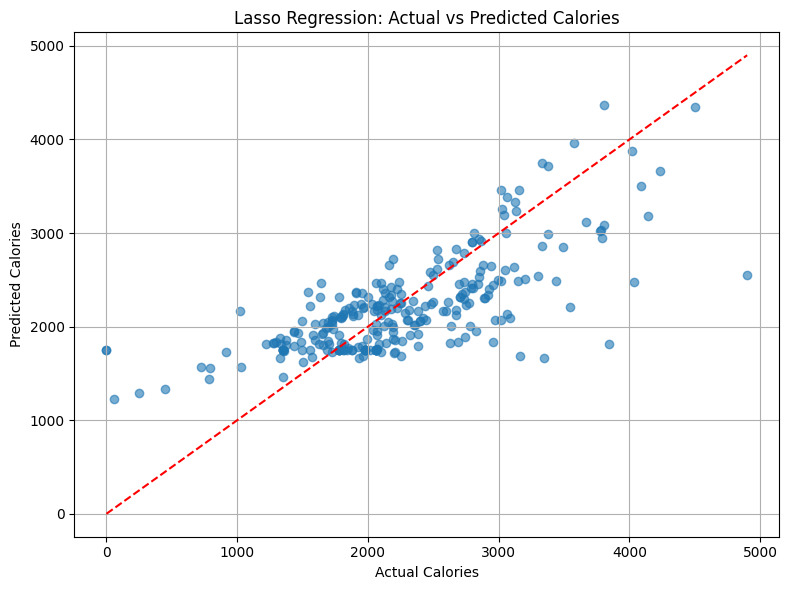

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Lasso Regression: Actual vs Predicted Calories')
plt.tight_layout()
plt.grid(True)
plt.show()

4. SVR

In [ ]:
# Calculate skewness for each feature
skewness = X_train.apply(lambda x: skew(x, nan_policy='omit'))
print("Skewness of features:")
print(skewness)

Skewness of features:
TotalSteps               0.686281
TotalDistance            1.217079
VeryActiveMinutes        2.242463
FairlyActiveMinutes     11.408464
LightlyActiveMinutes     0.106807
SedentaryMinutes        -0.322249
dtype: float64


In [ ]:
svr = SVR(kernel='rbf')
transformer = FunctionTransformer(np.log1p, feature_names_out='one-to-one')
preprocessing = Pipeline([
    ("log", transformer),
    ("standardize", StandardScaler()),
])

trans_data = preprocessing.fit_transform(X_train)
trans_df = pd.DataFrame(trans_data, columns=preprocessing.get_feature_names_out(), index=X_train.index) #get_feature_names_out() coz function Transformer doesn't rename cols
trans_df.head()

,TotalSteps,TotalDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
529,0.076498,-0.478800,-0.972786,-1.056521,-0.062451,0.785684
243,-2.911127,-2.062322,-0.972786,-1.056521,-2.614999,0.913450
1310,0.452549,0.652260,-0.185290,1.689270,0.340118,0.519768
664,-0.869370,-1.870731,-0.972786,-1.056521,-0.975416,0.187283
745,0.471937,0.560833,0.636645,0.349650,0.742534,0.271411


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1]
}
grid_svr = GridSearchCV(svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
grid_svr.fit(trans_data, y_train)
print(f"Best SVR parameters: {grid_svr.best_params_}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVR parameters: {'C': 100, 'gamma': 1}


In [ ]:
y_pred_svr = grid_svr.predict(preprocessing.transform(X_test))
svr_predictions = y_pred_svr.copy()

mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print("\nSVR (Tuned) Metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


SVR (Tuned) Metrics:
MAE: 398.5253249587628
MSE: 315783.6071514696
RMSE: 561.9462671390118
R² Score: 0.4409304837396939


In [ ]:
'''y_pred_svr = svr.predict(preprocessing.transform(X_test)) #transform test data
svr_predictions = y_pred_svr.copy()

mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print("SVR metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")'''

SVR metrics:
MAE: 534.1570533779995
MSE: 526018.2136349858
RMSE: 725.2711311192428
R² Score: 0.06872699664880844


In [ ]:
comparison_df_svr = pd.DataFrame({
    'Actual Calories': y_test.values[:10],
    'Predicted Calories': y_pred_svr[:10].round(2)
})
print(comparison_df_svr)

   Actual Calories  Predicted Calories
0             2354             1639.83
1             2324             2049.66
2             2044             2086.28
3             3439             2164.15
4             1878             1819.90
5             2638             1876.58
6             3021             3061.43
7             2187             2295.83
8             1377             1723.79
9             2925             2571.31


In [ ]:
'''comparison_df_svr = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_svr[:5].round(2)
})
print(comparison_df_svr)'''

   Actual Calories  Predicted Calories
0             2354             2031.70
1             2324             2068.16
2             2044             2207.71
3             3439             2192.05
4             1878             2005.60


SVR is closer to actual values for some predictions but still makes large errors

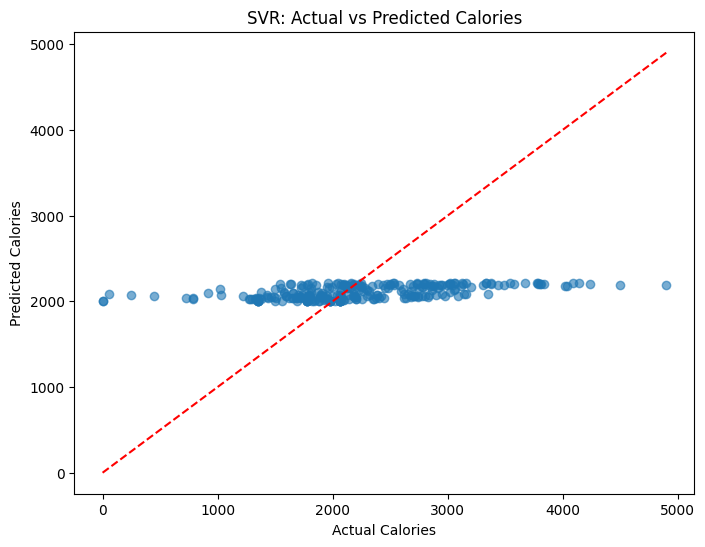

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('SVR: Actual vs Predicted Calories')
plt.show()

5. Decision Tree Regressor


In [ ]:
tree_reg = DecisionTreeRegressor()

cv_opt = GridSearchCV(tree_reg,
                      param_grid={'max_depth': np.arange(start=2, stop=200)}, #try 198 diff depths for training
                      scoring='neg_root_mean_squared_error', #lower rmse better model; we are using -ve coz it always tries to maximize the score. so you'll interpret it flipping sign
                      cv=5,
                      n_jobs=-1,
                      verbose=1,
                      return_train_score=True
                      )

cv_opt.fit(X_train, y_train)

Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  9...
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [ ]:
dt_reg=cv_opt.best_estimator_

In [ ]:
y_train_pred = cv_opt.best_estimator_.predict(X_train)
y_test_pred = cv_opt.best_estimator_.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

388.4406937928148
487.7664933993867


In [ ]:
y_pred_dt=y_test_pred
dt_predictions = y_pred_dt.copy()

mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Decision Tree metrics:
MAE: 366.4319523626532
MSE: 237916.152083134
RMSE: 487.7664933993867
R² Score: 0.5787885594965974


The model is performing better than prev ones

The Decision Tree is doing a better job, with an R² score of 0.563, meaning it explains over 56% of the variance. It also has lower MAE, MSE, and RMSE than SVR, making it a better model for this dataset.

In [ ]:
print("Best max_depth:", cv_opt.best_params_)


Best max_depth: {'max_depth': np.int64(7)}


In [ ]:
tree_reg_over = DecisionTreeRegressor(random_state=42) #untuned tree-overfitting-no limit on depth
tree_reg_over.fit(X_train, y_train)
y_train_pred = tree_reg_over.predict(X_train)
y_test_pred = tree_reg_over.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred)) #almost perfect on train data
print(root_mean_squared_error(y_test, y_test_pred))# performs worse oon test
#it memorised the training data but failed to generalize it

150.840211445051
549.0392770034583


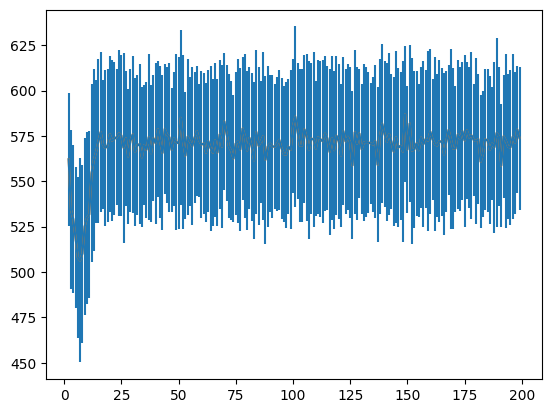

In [ ]:
results_df = pd.DataFrame(cv_opt.cv_results_)
results_df['mean_test_score'] *= -1
results_df['mean_train_score'] *= -1
plt.errorbar(results_df['param_max_depth'], results_df['mean_test_score'], yerr=results_df['std_test_score'])
plt.plot(results_df['param_max_depth'], results_df['mean_test_score'])
plt.show()

In [ ]:
!pip install graphviz

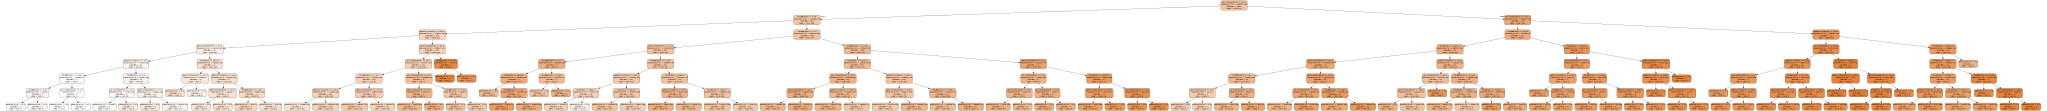

In [ ]:
export_graphviz(
        cv_opt.best_estimator_,
        out_file="calories.dot",
        feature_names=X_train.columns,
        rounded=True,
        filled=True
    )

Source.from_file("calories.dot").render(filename='calories_best', format='jpeg', directory='.', view=False)
Source.from_file("calories.dot")

In [ ]:
export_graphviz(
        tree_reg_over,
        out_file="calories.dot",
        feature_names=X_train.columns,
        rounded=True,
        filled=True
    )

Source.from_file("calories.dot").render(filename='calories_overfit', format='jpeg', directory='.', view=False)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.454472 to fit


'calories_overfit.jpeg'

In [ ]:
comparison_df_dt = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_dt[:5].round(2)
})
print(comparison_df_dt)

   Actual Calories  Predicted Calories
0             2354             1967.80
1             2324             1967.80
2             2044             2016.19
3             3439             2282.90
4             1878             1659.78


For Smaller Values:

SVR is generally underestimating the calories (e.g., for 2354 calories, it predicts 2059.65, underestimating by 294.35).

Decision Tree also underestimates, but it does so with larger errors (e.g., for 2354 calories, it predicts 1967.80, underestimating by 386.20).

For Larger Values:

SVR performs better for large values (e.g., for 3439 calories, SVR predicts 2172.27, which is a larger underestimation of -1266.73).

Decision Tree is similarly underpredicting 3439 calories with the same error -1266.73, so both models make similar large errors in this case.

The Decision Tree predicts closer to the actual value for 2044 calories (with a small error of -27.81).

For the same value, SVR overestimates it by +138.79 calories, showing a bigger deviation than the Decision Tree.

6. Voting Regressor

In [ ]:
voting_regressor=VotingRegressor(estimators=[('lr',lr_model ),('ridge',ridge_reg), ('svr', svr), ('tree', dt_reg)])

In [ ]:
X_train_transformed = preprocessing.fit_transform(X_train)
X_test_transformed = preprocessing.transform(X_test)

In [ ]:
voting_regressor.fit(X_train_transformed, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('ridge', Ridge(alpha=1)), ('svr', SVR()),
                            ('tree',
                             DecisionTreeRegressor(max_depth=np.int64(7)))])

In [ ]:
y_pred_voting = voting_regressor.predict(X_test_transformed)
voting_predictions = y_pred_voting.copy()

mae = mean_absolute_error(y_test, y_pred_voting)
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_voting)

print("Voting Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Voting Regression metrics:
MAE: 413.2586208249906
MSE: 280221.5966833947
RMSE: 529.3596099849276
R² Score: 0.5038901673311671


In [ ]:
'''voting_predictions = y_pred_voting.copy()

mae = mean_absolute_error(y_test, y_pred_voting)
mse = mean_squared_error(y_test, y_pred_voting)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_voting)

print("Voting Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")'''

Voting Regression metrics:
MAE: 382.44473919779307
MSE: 258518.47977152755
RMSE: 508.4471258366277
R² Score: 0.5423137928724335


The Voting Regressor is performing better than SVR and Ridge Regression alone, and it’s giving comparable results to the Decision Tree, but with slightly lower error metrics.

Decision Tree is currently giving better results than the Voting Regressor based on MAE, MSE, RMSE, and R² score.

In [ ]:
comparison_df_votingReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_voting[:5].round(2)
})
print(comparison_df_votingReg)

   Actual Calories  Predicted Calories
0             2354             1888.30
1             2324             1920.17
2             2044             2390.85
3             3439             2324.95
4             1878             1761.48


The Voting Regressor is generally underestimating the calories, with some larger errors:

For example, 3439 actual vs 2352 predicted leads to an underestimation of 1086.97 calories.

2324 actual vs 1951.21 predicted gives a similar underestimation of 372.79 calories.

The Voting Regressor's errors seem to be more consistent than the SVR model, which had more fluctuating errors (underestimating for some values, overestimating for others).

However, compared to the Decision Tree, Voting Regressor still seems to have larger errors, especially for larger calorie values (e.g., 3439 calories).

7. BaggingRegression


In [ ]:
scaler = StandardScaler()
bag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500, # number of estimators
                            max_samples=50, # number of observations for each estimator
                            n_jobs=-1, # train trees in parallel
                            random_state=42,
                            bootstrap=True # use False for pasting
                            )
bag_pipeline = make_pipeline(scaler, bag_reg)
bag_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=50, n_estimators=500, n_jobs=-1,
                                  random_state=42))])

In [ ]:
y_train_pred = bag_pipeline.predict(X_train)
y_test_pred = bag_pipeline.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

487.6163995602112
501.4013407714787


In [ ]:
y_pred_bag = y_test_pred

In [ ]:
bagging_predictions = y_pred_bag.copy()

mae = mean_absolute_error(y_test, y_pred_bag)
mse = mean_squared_error(y_test, y_pred_bag)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_voting)

print("bagging Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

bagging Regression metrics:
MAE: 400.97971281673887
MSE: 251403.3045274365
RMSE: 501.4013407714787
R² Score: 0.5038901673311671


In [ ]:
comparison_df_baggingReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_bag[:5].round(2)
})
print(comparison_df_baggingReg)

   Actual Calories  Predicted Calories
0             2354             1791.05
1             2324             1880.77
2             2044             2317.22
3             3439             2383.49
4             1878             1642.88


Out of Bagging Regression

In [ ]:
obag_reg = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500, # number of estimators
                            max_samples=50, # number of observations for each estimator
                            n_jobs=-1, # train trees in parallel
                            random_state=42,
                            oob_score=True
                            )
obag_pipeline = make_pipeline(scaler, obag_reg)
obag_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(estimator=DecisionTreeRegressor(),
                                  max_samples=50, n_estimators=500, n_jobs=-1,
                                  oob_score=True, random_state=42))])

In [ ]:
y_train_pred = obag_pipeline.predict(X_train)
y_test_pred = obag_pipeline.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

487.6163995602112
501.4013407714787


In [ ]:
obag_pipeline[-1].oob_score_

0.545127693686554

In [ ]:
y_pred_obag = y_test_pred

In [ ]:
obagging_predictions = y_pred_obag.copy()

mae = mean_absolute_error(y_test, y_pred_obag)
mse = mean_squared_error(y_test, y_pred_obag)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_obag)

print("Out of bagging Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Out of bagging Regression metrics:
MAE: 400.97971281673887
MSE: 251403.3045274365
RMSE: 501.4013407714787
R² Score: 0.5549106392309375


In [ ]:
comparison_df_obaggingReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_obag[:5].round(2)
})
print(comparison_df_obaggingReg)

   Actual Calories  Predicted Calories
0             2354             1791.05
1             2324             1880.77
2             2044             2317.22
3             3439             2383.49
4             1878             1642.88


Random Forest Regression

In [ ]:
rnd_reg = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)
rnf_pipeline = make_pipeline(scaler,rnd_reg)
rnf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_leaf_nodes=16, n_estimators=500,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_train_pred = rnf_pipeline.predict(X_train)
y_test_pred = rnf_pipeline.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

424.74757860682985
462.39302425364065


AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),
                             n_estimators=30,
                             learning_rate=0.5,
                             random_state=42)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.5, n_estimators=30, random_state=42)

In [ ]:
y_train_pred = ada_reg.predict(X_train)
y_test_pred = ada_reg.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

617.5194052987256
608.9655518054066


In [ ]:
y_pred_ada = y_test_pred

In [ ]:
adaBoostingRegressor_predictions = y_pred_ada.copy()

mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ada)

print("adaBoostingRegressor metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

adaBoostingRegressor metrics:
MAE: 473.0413484435921
MSE: 370839.04328566324
RMSE: 608.9655518054066
R² Score: 0.34345925549990797


In [ ]:
comparison_df_adaReg = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_ada[:5].round(2)
})
print(comparison_df_adaReg)

   Actual Calories  Predicted Calories
0             2354             1722.47
1             2324             2061.07
2             2044             2744.00
3             3439             2745.27
4             1878             1672.07


Not worth proceeding; we alrdy have better models

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=500,
                                 learning_rate=0.05, random_state=42)

gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          random_state=42)

In [ ]:
y_train_pred = gbrt.predict(X_train)
y_test_pred = gbrt.predict(X_test)

print(root_mean_squared_error(y_train, y_train_pred))
print(root_mean_squared_error(y_test, y_test_pred))

"""
,n_iter_no_change=10,
  358.1269281135418
  449.81672845224074
"""


335.32862959313667
447.8439821972835


'\n,n_iter_no_change=10,\n  358.1269281135418\n  449.81672845224074\n'

In [ ]:
y_pred_gbrt = y_test_pred

In [ ]:
gradientBoostingRegressor_predictions = y_pred_gbrt.copy()

mae = mean_absolute_error(y_test, y_pred_gbrt)
mse = mean_squared_error(y_test, y_pred_gbrt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gbrt)

print("GradientBoostingRegressor metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

GradientBoostingRegressor metrics:
MAE: 335.2705246625584
MSE: 200564.23239032074
RMSE: 447.8439821972835
R² Score: 0.6449171336250143


In [ ]:
comparison_df_gbrt = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_gbrt[:5].round(2)
})
print(comparison_df_votingReg)

   Actual Calories  Predicted Calories
0             2354             2004.71
1             2324             1951.21
2             2044             2128.89
3             3439             2352.03
4             1878             1789.63


GradientBoostingRegressor is showing significant improvement over AdaBoostRegressor.

The R² score of 0.6449 means the model is explaining 64.49% of the variance, which is a strong result compared to AdaBoost's 34.35%. This indicates that Gradient Boosting is better at capturing the relationships in the data.

The RMSE of 447.84 indicates that, on average, the model is off by ~448 calories, which is a good improvement from AdaBoost (608.97).

Gradient Boosting is doing much better, with RMSE of 447.84 and an R² score of 0.6449, explaining over 64% of the variance, which is a strong result


XGBoosting Regressor

In [ ]:
#!pip install xgboost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBRegressor(random_state=42)
grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5, n_jobs=-1, verbose=1)

grid_xgb.fit(X_train, y_train)

print(f"Best parameters: {grid_xgb.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
xgb_best = grid_xgb.best_estimator_

y_pred_xgb = xgb_best.predict(X_test)
xgb_predictions = y_pred_xgb.copy()
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression metrics:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

XGBoost Regression metrics:
MAE: 295.3179016113281
MSE: 173964.515625
RMSE: 417.09053648458627
R² Score: 0.6920098066329956


In [ ]:
comparison_df_xgb = pd.DataFrame({
    'Actual Calories': y_test.values[:5],
    'Predicted Calories': y_pred_xgb[:5].round(2)
})
print(comparison_df_xgb)

   Actual Calories  Predicted Calories
0             2354         1845.140015
1             2324         1889.689941
2             2044         2101.889893
3             3439         2788.949951
4             1878         1636.479980


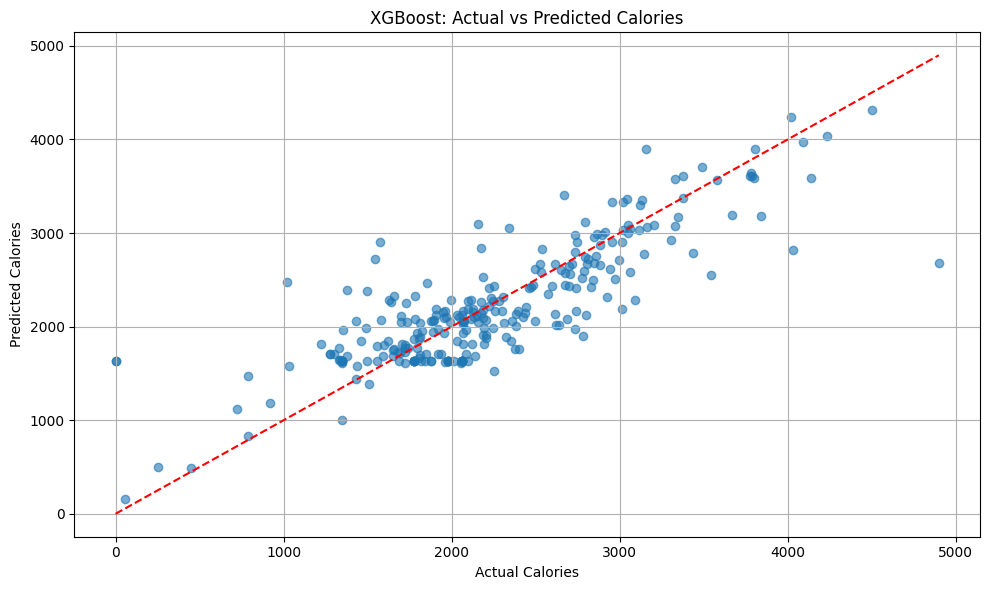

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('XGBoost: Actual vs Predicted Calories')
plt.grid(True)
plt.tight_layout()
plt.show()